<a href="https://colab.research.google.com/github/ELmounikor/IWD-Settat-2021/blob/master/Projet_Application_big_data_Analyse_de_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Projet Application big data: Analyse de sentiment**
- Réalisé par **Mounia EL KORAICHI**
- Encadré par **Pr. Habib Ayad**

# Introduction


Dans le cadre de la formation du Master de recherche Big Data et internet des objets au sein de l’école nationale supérieure des arts et métiers, nous étions amenées à réaliser un mini projet big data.

Il est de plus en plus courant de faire face à des situations où la quantité de données est tout simplement trop importante pour être gérée sur une seule machine. Heureusement, des technologies telles qu'Apache Spark, Hadoop et d'autres ont été développées pour résoudre exactement ce problème. La puissance de ces systèmes peut être exploitée directement à partir de Python en utilisant PySpark!

Vous pouvez visualiser le projet directement sur google colab à partir de ce [lien](https://colab.research.google.com/drive/1RSIsQ9Nqf8dBVjzEejE4c9EoU1uaivrL?usp=sharing): https://colab.research.google.com/drive/1RSIsQ9Nqf8dBVjzEejE4c9EoU1uaivrL?usp=sharing

Ce projet big data vise à predire l'avis des spectateurs vis-à-vis à des produits télévisés à partir du text de leurs commentaires

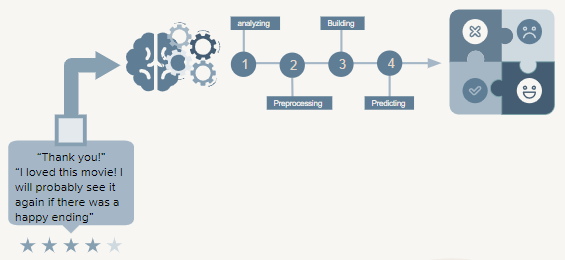

# Chargement des dépendances

In [ ]:
# Instalation de java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
# Instalation de Spark
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Instalation de pyspark
! pip install --ignore-installed pyspark==2.4.4

openjdk version "1.8.0_282"
OpenJDK Runtime Environment (build 1.8.0_282-8u282-b08-0ubuntu1~18.04-b08)
OpenJDK 64-Bit Server VM (build 25.282-b08, mixed mode)
     |████████████████████████████████| 215.7MB 73kB/s 
     |████████████████████████████████| 204kB 11.9MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130389 sha256=3f1f1dfb5d85b1e6696c7fcafc3e08d4d9a8c5ab906cd439e58aea5cf14cee29
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# *Chargement des données*

In [ ]:
# J'ai travaillé avec Google colab car il s'execute dans les serveurs de google au lieu de la machine (il est plus rapide)
from google.colab import files
files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
# J'ai definis '",' comme deliminateur pour ne pas perdre les données (car il y a des virgules dans les texts) 
# Et j'ai ajouté " avant la virgule dans la premiere ligne seulement 
dataset = spark.read.csv('IMDB Dataset.csv',header =True, sep='",', inferSchema=True)

In [ ]:
dataset.show()

+--------------------+---------+
|              review|sentiment|
+--------------------+---------+
|"One of the other...| positive|
|"A wonderful litt...| positive|
|"I thought this w...| positive|
|"Basically there'...| negative|
|"Petter Mattei's ...| positive|
|"Probably my all-...| positive|
|"I sure would lik...| positive|
|"This show was an...| negative|
|"Encouraged by th...| negative|
|"If you like orig...| positive|
|"Phil the Alien i...| negative|
|"I saw this movie...| negative|
|"So im not a big ...| negative|
|"The cast played ...| negative|
|This a fantastic ...|     null|
|"Kind of drawn in...| negative|
|"Some films just ...| positive|
|"This movie made ...| negative|
|"I remember this ...| positive|
|"An awful film! I...| negative|
+--------------------+---------+
only showing top 20 rows



# *Analyse générale des données*

In [ ]:
dataset.printSchema()

root
 |-- review: string (nullable = true)
 |-- sentiment: string (nullable = true)



In [ ]:
dataset.count()

50000

In [ ]:
dataset.describe().show()

+-------+--------------------+--------------------+
|summary|              review|           sentiment|
+-------+--------------------+--------------------+
|  count|               50000|               48463|
|   mean|                null|                null|
| stddev|                null|                null|
|    min|!!!!! OF COURSE T...| "" the nerd type...|
|    max|zero day is based...|worth watching if...|
+-------+--------------------+--------------------+



# Calcul le nombre de ‘review’ non labélisés

In [ ]:
dataset.count()-dataset.filter((dataset['sentiment']=='positive')|(dataset['sentiment']=='negative')).count()

5601

# Construction un dataFrame qui contient seulement les ‘review’ labélisés

In [ ]:
df=dataset.filter((dataset['sentiment']=='positive')|(dataset['sentiment']=='negative'))

In [ ]:
df.groupBy('sentiment').count().show()
# nous constatons que la dataset est equilibré

+---------+-----+
|sentiment|count|
+---------+-----+
| positive|22096|
| negative|22303|
+---------+-----+



# Enregistrement un nouveau dataFrame au format json en un seul fichier

In [ ]:
df.write.json("imdb.json")

In [ ]:
file= spark.read.json("imdb.json")
file

DataFrame[review: string, sentiment: string]

In [ ]:
file.show()

+--------------------+---------+
|              review|sentiment|
+--------------------+---------+
|"One of the other...| positive|
|"A wonderful litt...| positive|
|"I thought this w...| positive|
|"Basically there'...| negative|
|"Petter Mattei's ...| positive|
|"Probably my all-...| positive|
|"I sure would lik...| positive|
|"This show was an...| negative|
|"Encouraged by th...| negative|
|"If you like orig...| positive|
|"Phil the Alien i...| negative|
|"I saw this movie...| negative|
|"So im not a big ...| negative|
|"The cast played ...| negative|
|"Kind of drawn in...| negative|
|"Some films just ...| positive|
|"This movie made ...| negative|
|"I remember this ...| positive|
|"An awful film! I...| negative|
|"After the succes...| positive|
+--------------------+---------+
only showing top 20 rows



# Prétraitement des données

In [ ]:
df.select("review").first()

Row(review='"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is 

**Convertir le texte de la colonne ‘review’ en vecteur de mots**

In [ ]:
from pyspark.ml.feature import RegexTokenizer

In [ ]:
tokenizer= RegexTokenizer(inputCol="review",outputCol="mots", pattern="\\W", toLowercase=True, gaps=True)

In [ ]:
df=tokenizer.transform(df)

In [ ]:
df.show(n=2)

+--------------------+---------+--------------------+
|              review|sentiment|                mots|
+--------------------+---------+--------------------+
|"One of the other...| positive|[one, of, the, ot...|
|"A wonderful litt...| positive|[a, wonderful, li...|
+--------------------+---------+--------------------+
only showing top 2 rows



**Créer une fonction udf permettant de convertir les labels ‘positive’ et ‘negative’ en 1 et 0**


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

toNum = lambda label:int(("0","1")[label=='positive'])
toNum = udf(toNum,'int')
df= df.withColumn('sentiment', toNum(df["sentiment"]))
df.show()

+--------------------+---------+--------------------+
|              review|sentiment|                mots|
+--------------------+---------+--------------------+
|"One of the other...|        1|[one, of, the, ot...|
|"A wonderful litt...|        1|[a, wonderful, li...|
|"I thought this w...|        1|[i, thought, this...|
|"Basically there'...|        0|[basically, there...|
|"Petter Mattei's ...|        1|[petter, mattei, ...|
|"Probably my all-...|        1|[probably, my, al...|
|"I sure would lik...|        1|[i, sure, would, ...|
|"This show was an...|        0|[this, show, was,...|
|"Encouraged by th...|        0|[encouraged, by, ...|
|"If you like orig...|        1|[if, you, like, o...|
|"Phil the Alien i...|        0|[phil, the, alien...|
|"I saw this movie...|        0|[i, saw, this, mo...|
|"So im not a big ...|        0|[so, im, not, a, ...|
|"The cast played ...|        0|[the, cast, playe...|
|"Kind of drawn in...|        0|[kind, of, drawn,...|
|"Some films just ...|      

**Supprimer les stopWords**

In [ ]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover(inputCol='mots', outputCol="mots_essentiels")
df = remover.transform(df)
df.show(n=2, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.show(n=2, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Créer une fonction udf permettant de supprimer les caractères spéciaux et les mots de longueur inférieure à 3**


In [ ]:
cleaner = lambda mots: [w for w in mots if (w.isalpha()==True and len(w)>2)]
cleaner = udf(cleaner, ArrayType(StringType()))
df = df.withColumn('mots_essentiels', cleaner(df["mots_essentiels"]))
df.show(n=2, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Calculer la fréquence du mot ‘zombie’ et du mot ‘drama’**

In [ ]:
#frequence par review 
zombie_frequence = lambda mots:(mots.count("zombie")/len(mots))
zombie_frequence = udf(zombie_frequence,'float')

drama_frequence = lambda mots:(mots.count("drama")/len(mots))
drama_frequence = udf(drama_frequence,'float')

data = df.withColumn('drama_frequence', zombie_frequence(df['mots_essentiels']))
data = data.withColumn('zombie_frequence', drama_frequence(data['mots_essentiels']))
data.show()

+--------------------+---------+--------------------+--------------------+---------------+----------------+
|              review|sentiment|                mots|     mots_essentiels|drama_frequence|zombie_frequence|
+--------------------+---------+--------------------+--------------------+---------------+----------------+
|"One of the other...|        1|[one, of, the, ot...|[one, reviewers, ...|            0.0|             0.0|
|"A wonderful litt...|        1|[a, wonderful, li...|[wonderful, littl...|            0.0|             0.0|
|"I thought this w...|        1|[i, thought, this...|[thought, wonderf...|            0.0|             0.0|
|"Basically there'...|        0|[basically, there...|[basically, famil...|    0.031746034|      0.04761905|
|"Petter Mattei's ...|        1|[petter, mattei, ...|[petter, mattei, ...|            0.0|             0.0|
|"Probably my all-...|        1|[probably, my, al...|[probably, time, ...|            0.0|             0.0|
|"I sure would lik...|      

In [ ]:
data.describe().show()

+-------+--------------------+------------------+--------------------+--------------------+
|summary|              review|         sentiment|     drama_frequence|    zombie_frequence|
+-------+--------------------+------------------+--------------------+--------------------+
|  count|               44399|             44399|               44399|               44399|
|   mean|                null|0.4976688664159103|1.723323406629968...| 5.51312336777129E-4|
| stddev|                null|0.5000001965780517|0.002135039786047...|0.003031696323284277|
|    min|"!!! Spoiler aler...|                 0|                 0.0|                 0.0|
|    max|"ý thýnk uzak ýs ...|                 1|          0.11111111|         0.078431375|
+-------+--------------------+------------------+--------------------+--------------------+



# Vectorization du modéle

 Créer un modèle de classification en utilisant les algorithmes: Régression Logistique, Naïve Bayes, et SVM


In [ ]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="mots_essentiels", outputCol="features")
df = df.withColumn('label', df["sentiment"])
df = cv.fit(df).transform(df)

In [ ]:
df.show(2)

+--------------------+---------+--------------------+--------------------+--------------------+-----+
|              review|sentiment|                mots|     mots_essentiels|            features|label|
+--------------------+---------+--------------------+--------------------+--------------------+-----+
|"One of the other...|        1|[one, of, the, ot...|[one, reviewers, ...|(92386,[2,10,13,1...|    1|
|"A wonderful litt...|        1|[a, wonderful, li...|[wonderful, littl...|(92386,[2,5,7,9,1...|    1|
+--------------------+---------+--------------------+--------------------+--------------------+-----+
only showing top 2 rows



In [ ]:
train, test = df.select("features","label").randomSplit([0.8,0.2],seed=100)

In [ ]:
train.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(92386,[0,1,2,3,4...|    0|
|(92386,[0,1,2,3,4...|    1|
|(92386,[0,1,2,3,4...|    1|
+--------------------+-----+
only showing top 3 rows



# Création et évaluation des modéles

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

nb = NaiveBayes()
logireg = LogisticRegression()
svm = LinearSVC()

model = nb.fit(train)

In [ ]:
prediction = model.transform(test)
prediction.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(92386,[0,1,2,3,4...|    1|[-4070.0789747265...|[9.39594782544981...|       1.0|
|(92386,[0,1,2,3,4...|    0|[-1975.7685716736...|[1.0,8.7810797295...|       0.0|
|(92386,[0,1,2,3,4...|    0|[-4504.3297811451...|[0.01590360402531...|       1.0|
|(92386,[0,1,2,3,4...|    1|[-7051.1671479083...|[1.31234974774770...|       1.0|
|(92386,[0,1,2,3,4...|    1|[-5757.0983387841...|[9.81177965694858...|       1.0|
|(92386,[0,1,2,3,4...|    0|[-4447.2182098612...|[0.80600393560909...|       0.0|
|(92386,[0,1,2,3,4...|    1|[-3034.6398131027...|[1.58583157243881...|       1.0|
|(92386,[0,1,2,3,4...|    0|[-2939.0112516597...|[1.0,4.6985324027...|       0.0|
|(92386,[0,1,2,3,4...|    0|[-1976.5706590761...|[1.0,8.2685930080...|       0.0|
|(92386,[0,1,2,3

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy = evaluator.evaluate(prediction, {evaluator.metricName: "accuracy"})
print('Précision du Naïve Bayes', accuracy)

Précision du Naïve Bayes 0.8610452647025624


In [ ]:
model = logireg.fit(train)

In [ ]:
prediction = model.transform(test)
prediction.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(92386,[0,1,2,3,4...|    1|[-202.57707371292...|[1.05170690759296...|       1.0|
|(92386,[0,1,2,3,4...|    0|[132.496233642956...|           [1.0,0.0]|       0.0|
|(92386,[0,1,2,3,4...|    0|[78.9157419533591...|           [1.0,0.0]|       0.0|
|(92386,[0,1,2,3,4...|    1|[-294.00545583438...|[2.06563166122583...|       1.0|
|(92386,[0,1,2,3,4...|    1|[-104.13604625464...|[5.94688779516416...|       1.0|
|(92386,[0,1,2,3,4...|    0|[74.0511786904518...|           [1.0,0.0]|       0.0|
|(92386,[0,1,2,3,4...|    1|[-51.274270576740...|[5.39345705329058...|       1.0|
|(92386,[0,1,2,3,4...|    0|[112.409408870436...|           [1.0,0.0]|       0.0|
|(92386,[0,1,2,3,4...|    0|[95.8432876521816...|           [1.0,0.0]|       0.0|
|(92386,[0,1,2,3

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy = evaluator.evaluate(prediction, {evaluator.metricName: "accuracy"})
print('Précision de la Régression Logistique', accuracy)

Précision de la Régression Logistique 0.8626255785077322


In [ ]:
model = svm.fit(train)

In [ ]:
prediction = model.transform(test)
prediction.show()

+--------------------+-----+--------------------+----------+
|            features|label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|(92386,[0,1,2,3,4...|    1|[-14.685108896240...|       1.0|
|(92386,[0,1,2,3,4...|    0|[6.77045580900764...|       0.0|
|(92386,[0,1,2,3,4...|    0|[5.54534667853544...|       0.0|
|(92386,[0,1,2,3,4...|    1|[-16.662540428839...|       1.0|
|(92386,[0,1,2,3,4...|    1|[-3.0440791479498...|       1.0|
|(92386,[0,1,2,3,4...|    0|[1.80209559186229...|       0.0|
|(92386,[0,1,2,3,4...|    1|[-4.2201074787797...|       1.0|
|(92386,[0,1,2,3,4...|    0|[10.6333484417863...|       0.0|
|(92386,[0,1,2,3,4...|    0|[7.56539564436379...|       0.0|
|(92386,[0,1,2,3,4...|    0|[5.91873214610274...|       0.0|
|(92386,[0,1,2,3,4...|    1|[-10.710768741764...|       1.0|
|(92386,[0,1,2,3,4...|    1|[-8.2845739894362...|       1.0|
|(92386,[0,1,2,3,4...|    0|[1.08950042806162...|       0.0|
|(92386,[0,1,2,3,4...|  

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy = evaluator.evaluate(prediction, {evaluator.metricName: "accuracy"})
print('Précision du SVM', accuracy)

Précision du SVM 0.8873462016028897


L'ordre des modéles par taux d'accuracy est comme suit:


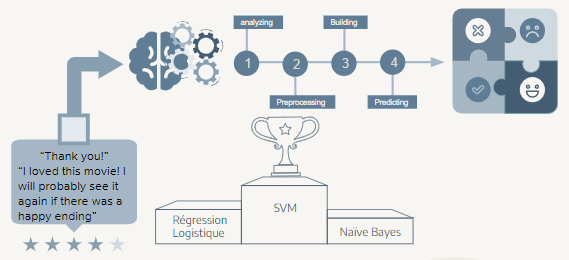


Précision du SVM 0.8873462016028897


Précision de la Régression Logistique 0.8626255785077322


Précision du Naïve Bayes 0.8610452647025624

# Conclusion

Avant de conclure, nous tenons à remercier notre professeur Monsieur Habib Ayad pour cette opportunité que fût ce projet en entier pour acquérir des informations solides en big data et analyse des données. Nous continuerons à élargir nos compétences dans ce domaine qui nous tient à cœur. En n’importe quel projet de big data ou de machine learning en général nous remarquons que la compréhension des données optimise l’efficacité du modèle, ceci dit l’analyse et la visualisation des données sont indispensables pour optimiser la méthodologie utilisée lors du preprocessing et de modélisation.